# Basics of Quantum computing using Qibo framework
We will cover some basics of quantum computing and how to use the Qibo framework. Qibo is a Python-based framework designed for quantum simulation and hardware control. It shares a lot of commonalities with other quantum-based programming tools like Qiskit and Cirq, so the knowledge here is transferrable.

In this lesson, you will learn
- How to use Qibo
- Basic quantum logic gates
- Measurement and results from a quantum program

In a program, we request for memory and apply operations on said memory to perform computations. For quantum programing, we use qubits as our "memory" to perform computations.

To begin, we will explore the foundation of a quantum program: a **Quantum Circuit.**

In [1]:
pip install qibo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 

In [ ]:
import qibo
import logging

logger = logging.getLogger("qibo")
logger.setLevel(logging.CRITICAL)

In [2]:
from qibo import Circuit
circ = Circuit(nqubits=1)

A quantum circuit defines the number of qubits we will use. By default, all qubits will be initalised in the $|0\rangle$ state. Here, we have requested for a single qubit in our circuit.

Next, lets explore the various operations we can perform on our qubit.

# Quantum Logic Gates
In digital logic, operations on classical bits are known as gates. An example of a gate is the NOT gate, which flips a bit from 0 to 1, and vice versa. This is the negation(!) operator in typical programing languages. The quantum equivalent of this gate is the $X$ gate, which has the following matrix representation:

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

As a reminder, the ground and excited state of the qubit have the following representation:

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$



# Exercise 1

Apply the $X$ gate to the $|0\rangle$ and $|1\rangle$ states.

Hint (formula for matrix multiplication):

$\begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} e \\ f \end{bmatrix} = \begin{bmatrix} ae & bf \\ ce & df \end{bmatrix}$



# Applying a gate in Qibo
Now that we know our quantum gate does exactly what we expect it to, let's apply it in the quantum circuit.

In [3]:
from qibo import gates

# Apply a X gate on qubit 0
xgate = gates.X(0)
circ.add(xgate)
print(circ.draw())      # you should see a -X-, which represents an X gate

q0: ─X─


During circuit initalization, we requested for 1 qubit. The qubits are zero-indexed, so we will apply the X gate on qubit 0.

Next, we add the gate to the circuit, which will execute added gates from first to last.

# Measurement and Results
Now, we have a qubit and a circuit that will run an X gate, but how do we run it and what kind of results do we expect?

For this, we look at the measurement or M gate, which tells the circuit to measure the specified qubit. This action collapses the qubit to either the $|0⟩$ state or the $|1⟩$ state.

In [4]:
circ = Circuit(nqubits=1)

# Apply a X gate on qubit 0
xgate = gates.X(0)
measure_gate = gates.M(0)
circ.add(xgate)

# Do a measurement at the end for qubit 0
circ.add(measure_gate)

# Run the quantum circuit 100 times to see results
results= circ(nshots=100)
print(results.samples()[:,0])

[Qibo 0.2.8|INFO|2024-06-19 12:38:47]: Using tensorflow backend on /device:CPU:0
INFO:qibo.config:Using tensorflow backend on /device:CPU:0


tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(100,), dtype=int32)


As expected of applying the X gate on the $|0⟩$ state, we get a 100% probability of obtaining the $|1⟩$ state. Here, we have run the circuit 100 times. This is because each measurement outcome is dependent on the state probability amplitude.


Hence, a single measurement may not reveal the superposition of states.

# The Hadamard Gate
So far, what we are doing is in the realm of classical logic. It is akin to doing in Python:

```python
qubit = False
qubit = not qubit
```
Let's do something more quantum with the Hadamard or H gate. It has the following representation:

$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

# Exercise 2
1) Apply the $H$ gate on the $|0⟩$ state and calculate the expected outcome.

$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = ?$

Solution:

$H|0⟩ = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = |+⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} |0⟩ + |1⟩  \end{bmatrix}$
<br> <br>
2) Apply the $H$ gate on the $|1⟩$ state and calculate the expected outcome.

$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = ?$

Solution:

$H|0⟩ = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} = |-⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} |0⟩ -|1⟩  \end{bmatrix}$

# Exercise 2

Apply the $H$ gate on the $|0⟩$ state in Qibo:


In [7]:
from qibo import gates, Circuit

circ = Circuit(1)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

# Add the hadamard gate and the measure gate to the circuit
circ.add(hadamard_gate)
circ.add(measure_gate)

print(circ.draw())
results = circ(nshots=100)

print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

q0: ─H─M─
P(|0>): tf.Tensor(0.5, shape=(), dtype=float64)
P(|1>): tf.Tensor(0.5, shape=(), dtype=float64)


As expected, we have a 50% chance of measuring for each state. Let's look at the individual result of each measurement.

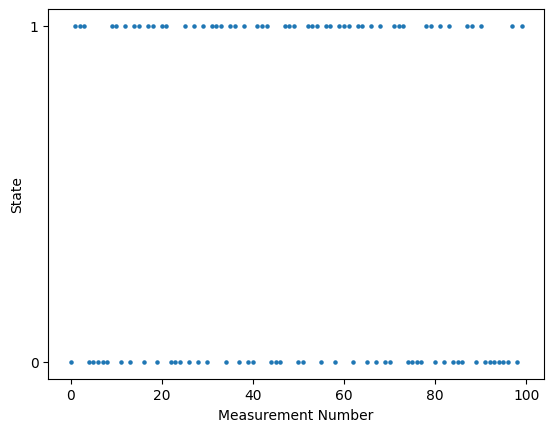

In [11]:
import numpy as np
import matplotlib.pyplot as plt

states = results.samples()[:, 0]
plt.scatter(np.arange(len(states)), states, s=5)
plt.xlabel("Measurement Number")
plt.ylabel("State")
plt.yticks([0, 1])
plt.show()

Note: the outcome for each measurement is truly random (you can try to run as many times as possible, each iteration will show different results), and we require some number of measurements to properly resolve the superposition probability.

Instead of the $|0⟩$ state, let's look at what happens if we apply the $H$ gate on the $|1⟩$ state instead.

$H|1⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} |0⟩ -|1⟩  \end{bmatrix}$

While there is a phase shift of -1 on the $|1⟩$ state, the probability of measuring each state is

$P(|0⟩) = (\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

$P(|1⟩) = (-\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

This is the same probability as applying the $H$ gate on the $|0⟩$ state. These special states are known as $|+⟩$ and $|-⟩$ states.

$|+⟩ = H|0⟩ = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩)$

$|-⟩ = H|1⟩ = \frac{1}{\sqrt{2}} (|0⟩ - |1⟩)$

# Exercise 4

create the $|+⟩$ and the $|-⟩$ states and measure their probabilities with Qibo

In [12]:
from qibo import gates, Circuit

circ = Circuit(1)
xgate = gates.X(0)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

# Gate Setup
circ.add(xgate)
circ.add(hadamard_gate)
circ.add(measure_gate)

print(circ.draw())
results = circ(nshots=100)

print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

q0: ─X─H─M─
P(|0>): tf.Tensor(0.5, shape=(), dtype=float64)
P(|1>): tf.Tensor(0.5, shape=(), dtype=float64)


# Measurement in different bases

We know from the mathematics that the $|+⟩$ and $|-⟩$ states are different, yet the measurement returns the same state probabilities for both. How do differentiate the two states?

For this, we turn back to the $H$ gate. As we've seen, it turns $|0⟩$ to $|+⟩$ and $|1⟩$ to $|-⟩$.

However, the reverse is also true (the proof is left to the reader as a trivial exercise).

This lets us map $|+⟩$ to $|0⟩$ and $|-⟩$ to $|1⟩$.

In [14]:
from qibo import gates, Circuit
import numpy as np

plus_state = np.array([1, 1]) / np.sqrt(2)
minus_state = np.array([1, -1]) / np.sqrt(2)

circ = Circuit(1)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

results = circ(nshots=100, initial_state=plus_state)
print("|+>")
print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))
print()
results = circ(nshots=100, initial_state=minus_state)
print("|->")
print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

|+>
P(|0>): tf.Tensor(0.5, shape=(), dtype=float64)
P(|1>): tf.Tensor(0.5, shape=(), dtype=float64)

|->
P(|0>): tf.Tensor(0.5, shape=(), dtype=float64)
P(|1>): tf.Tensor(0.5, shape=(), dtype=float64)


With the Hadamard gate, we transform the measurement basis from  to \{ ${|0⟩, |1⟩}$ \}. This is a unique property that differentiates quantum computing from classical computing.

Next we will close the first part with a primer on other single qubit gates.


# Typical Single Qubit Gates

For part 1, we have covered the $X$ and $H$ gates

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

We also have the $Y$ gate. It is very similar to the $X$ gate in switching the $|0⟩$ state and the $|1⟩$ state.

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$

It also applies a phase shift of $i$ on the new $|1⟩$ state. Much like the Hadamard gate, these phases cannot be measured in the \{ ${|0⟩, |1⟩}$ \} basis.

On the first glace, the $Z$ gate appears very similar to the identity matrix/gate.

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

The difference is that it applies a phase shift of -1 on the $|1⟩$ state.